**JOHN WILSON LORIN**

**BSCS-3A**

# 1. DATASET PREPARATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA


In [2]:
data = pd.read_csv('most-polluted-countries.csv')

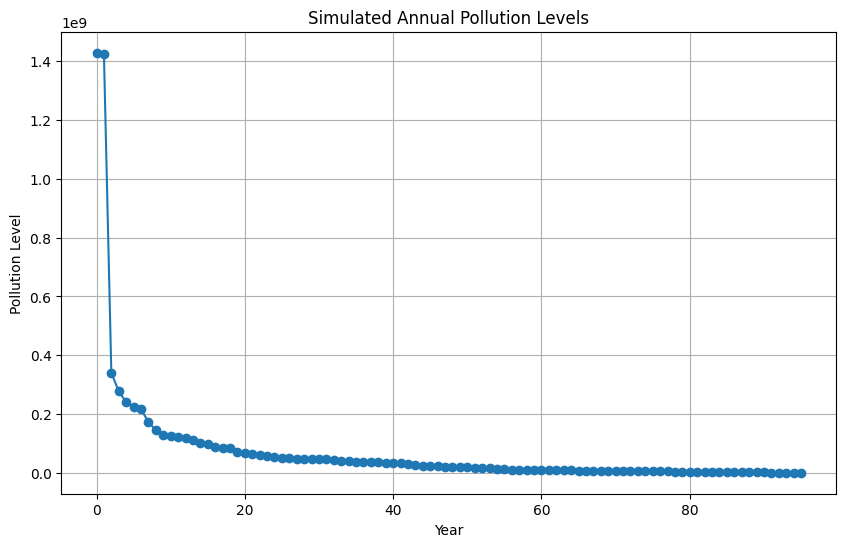

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['pollution_2023'], marker='o')
plt.title('Simulated Annual Pollution Levels')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.grid(True)
plt.show()

# 2. STATIONARITY TESTING

In [26]:
result = adfuller(data['pollution_2023'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.300734202893016
p-value: 0.01484568748394119
Critical Values: {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}


# 3. ARIMA MODEL IDENTIFICATION

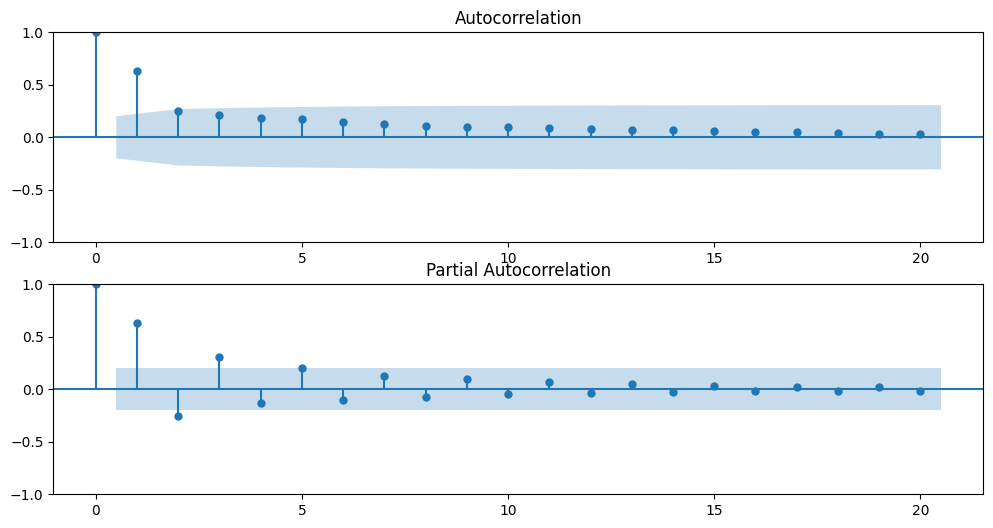

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data['pollution_2023'], ax=plt.gca(), lags=20)
plt.subplot(212)
plot_pacf(data['pollution_2023'], ax=plt.gca(), lags=20)
plt.show()


# 4. ARIMA MODEL FITTING

                               SARIMAX Results                                
Dep. Variable:         pollution_2023   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21643.144
Date:                Thu, 28 Mar 2024   AIC                          43292.288
Time:                        10:40:24   BIC                          43299.949
Sample:                             0   HQIC                         43295.384
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6301      0.000   3971.372      0.000       0.630       0.630
ma.L1         -0.9165      0.000  -5155.984      0.000      -0.917      -0.916
sigma2      2.177e+13   1.04e-17   2.09e+30      0.0

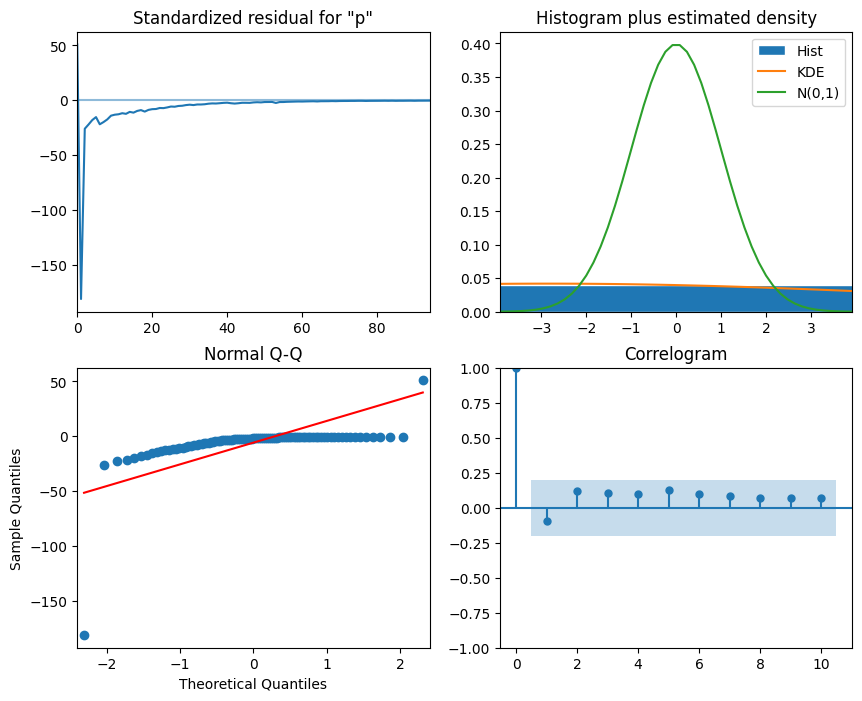

In [28]:
model = ARIMA(data['pollution_2023'], order=(1, 1, 1))
fit_model = model.fit()
print(fit_model.summary())
fit_model.plot_diagnostics(figsize=(10, 8))
plt.show()


# 5. FORECASTING

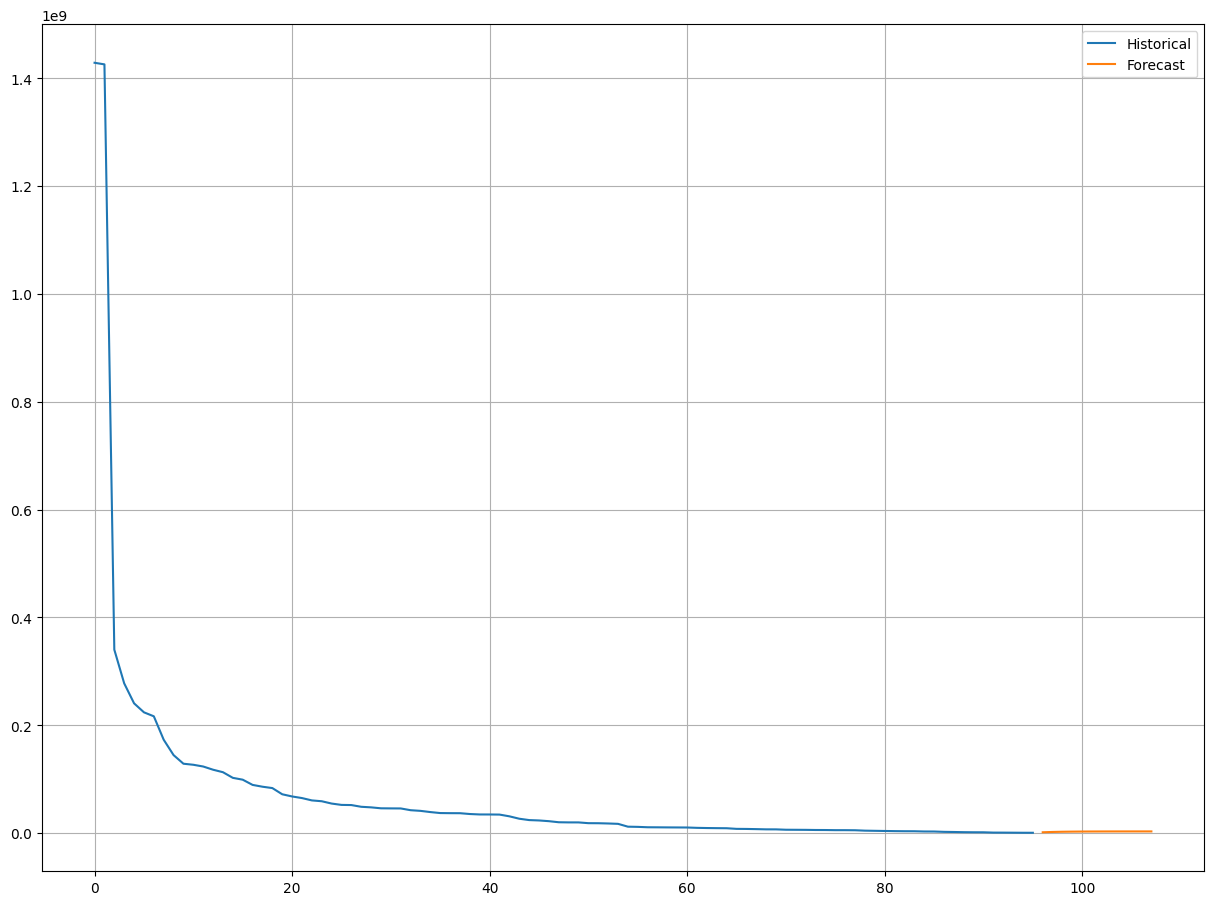

In [31]:
forecast = fit_model.forecast(steps = 12)
plt.figure(figsize = (15, 11))
plt.plot(data.index, data['pollution_2023'], label = 'Historical')
plt.plot(forecast.index, forecast, label = 'Forecast')
plt.legend()
plt.grid(True)
plt.show()

# 6. REPORT AND INSIGHTS

In [25]:
report = f"""


Real-world implications:
Insights from this analysis could inform policymakers about potential future pollution levels, aiding in environmental management decisions.
Understanding the trend and seasonality helps in developing strategies for pollution control and mitigation.
Forecasting can assist in allocating resources effectively for environmental protection measures.

"""

print(report)




Real-world implications:
Insights from this analysis could inform policymakers about potential future pollution levels, aiding in environmental management decisions.
Understanding the trend and seasonality helps in developing strategies for pollution control and mitigation.
Forecasting can assist in allocating resources effectively for environmental protection measures.


